In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt


from nltk import word_tokenize, sent_tokenize
import nltk
from nltk.corpus import stopwords

# nltk.download('punkt')
# nltk.download('stopwords')

## Data

In [65]:
data = pd.read_csv("data/ACL_data.csv")
data = data[~pd.isnull(data['ABSTRACT'])] # filtro abstracts nulos 
data = data[data["ABSTRACT"]!= 't']
data = data.drop_duplicates(subset = ['YEAR',  'TITLE', 'ABSTRACT', 'AUTHOR']) 
data.sort_values(by = 'YEAR', inplace = True, ascending =True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33668 entries, 33810 to 0
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   YEAR       33668 non-null  int64 
 1   TITLE      33668 non-null  object
 2   ABSTRACT   33668 non-null  object
 3   AUTHOR     33628 non-null  object
 4   PUBLISHER  32809 non-null  object
 5   BOOKTITLE  33014 non-null  object
 6   CATEGORY   33668 non-null  object
dtypes: int64(1), object(6)
memory usage: 2.1+ MB


In [66]:
data.ABSTRACT.isnull().values.any()

False

## Cleaning

In [67]:
STOP_WORDS_en = stopwords.words("english")
STOP_WORDS_fr = stopwords.words("french")
STOP_WORDS = STOP_WORDS_fr + STOP_WORDS_en

def tokenize(x):
    return [word for word in word_tokenize(x) if word not in STOP_WORDS_en and word.isalpha() and len(word)>1]
    
texts= [tokenize(str(doc).lower()) for doc in data['ABSTRACT']]

texts_df = pd.DataFrame([' '.join(text) for text in texts], columns = ['text'])

data['ABSTRACT'] = texts_df


In [70]:
print(len(data[data.ABSTRACT.isnull()]))
data[data.ABSTRACT.isnull()].to_csv('data/abstracts_nulos_postprocesamiento.csv')

124


## Sampling

In [51]:
anio_corte = 2016
len(data[data['YEAR']==anio_corte])

1816

In [57]:
paper_sample = len(data[data['YEAR']==anio_corte])
semilla = 420

data_original = data.copy() 

data =data[~pd.isnull(data['ABSTRACT'])]

data_sample = data[data['YEAR']<anio_corte].sort_values('YEAR', ascending =True)
data_sample

for i in range(anio_corte, 2023):
    data_i = data[data['YEAR']== i].sample(paper_sample, random_state= semilla) 
    
    data_sample = pd.concat([data_sample, data_i])

# ordeno por año y creo time_slice
data_sample.sort_values(by = 'YEAR', inplace = True, ascending =True)
time_slice = data_sample.groupby(['YEAR'])['YEAR'].count()

data_sample.YEAR.value_counts(normalize = True)
data_sample

,YEAR,TITLE,ABSTRACT,AUTHOR,PUBLISHER,BOOKTITLE,CATEGORY
33645,1991,The Translator{'}s Workbench: An Environment f...,work assumes languages structured semantic fra...,"Kugler, Marianne and",NaN,Proceedings of Machine Translation Summit III:...,INPROCEEDINGS
33635,1991,ULTRA}: A Multi-lingual Machine Translator,spread fake news propaganda misinformation dis...,"Farwell, David and",NaN,Proceedings of Machine Translation Summit III:...,INPROCEEDINGS
33653,1991,Parsing = Parsimonious Covering?,social media one significantdigital platforms ...,"Dasigi, Venu",Association for Computational Linguistics,Proceedings of the Second International Worksh...,INPROCEEDINGS
33651,1991,Proceedings of the Second International Worksh...,increasing interest modeling dynamics temporal...,"Tomita, Masaru and",Association for Computational Linguistics,Proceedings of the Second International Worksh...,INPROCEEDINGS
33650,1991,Connectionist and Symbolic Processing in Speec...,work propose application abstract meaning repr...,"Jain, A. N. and",NaN,Proceedings of Machine Translation Summit III:...,INPROCEEDINGS
...,...,...,...,...,...,...,...
2515,2022,Cross-Utterance Conditioned {VAE} for Non-Auto...,propose two general robust methods enriching r...,"Li, Yang and",Association for Computational Linguistics,Proceedings of the 60th Annual Meeting of the ...,INPROCEEDINGS
2278,2022,Improving {R}omanian {B}io{NER} Using a Biolog...,paper investigate coverage two knowledge sourc...,"Mitrofan, Maria and",Association for Computational Linguistics,Proceedings of the 21st Workshop on Biomedical...,INPROCEEDINGS
2434,2022,Revisiting the Compositional Generalization Ab...,cet article pr sente un projet de rep rage ext...,"Patel, Arkil and",Association for Computational Linguistics,Proceedings of the 60th Annual Meeting of the ...,INPROCEEDINGS
2603,2022,DYLE}: Dynamic Latent Extraction for Abstracti...,paper describes statistical mt system improvem...,"Mao, Ziming and",Association for Computational Linguistics,Proceedings of the 60th Annual Meeting of the ...,INPROCEEDINGS


In [59]:
dataset = data_sample.ABSTRACT.tolist()
dataset[0]

'work assumes languages structured semantic frames schematic representations concepts metaphors hand cognitive projections domains result interaction world experiences expectations human biology work use semantic frames metaphors multilingual contrast brazilian portuguese english german aim present descriptive study metaphors frames multilingual shared annotation task multilingual framenet task consisted using frames berkeley framenet annotate parallel corpora result shows parameters annotation considering frames metaphors'

## Export

In [62]:
data.to_csv('data/ACL_data_without_nulls.csv', index = False)

data_sample.to_csv('data/data_sample.csv', index = False)
time_slice.to_csv('data/time_slice.csv', index = False)

data_abstracts = data_sample['ABSTRACT']
data_abstracts.to_csv('data/data_clean.csv', index = False)


In [73]:
pd.DataFrame(data_abstracts, columns = ['text'])

,text


## Word count

In [63]:
new_df = texts_df.text.str.split(expand=True).stack().value_counts().reset_index()
 
new_df.columns = ['Word', 'Frequency'] 
 
new_df.to_csv('data/word_count.csv', index = False)

new_df

,Word,Frequency
0,model,24566
1,language,24078
2,models,21509
3,data,19228
4,task,17089
...,...,...
48153,maillard,1
48154,pathlstm,1
48155,biosmile,1
48156,biokit,1


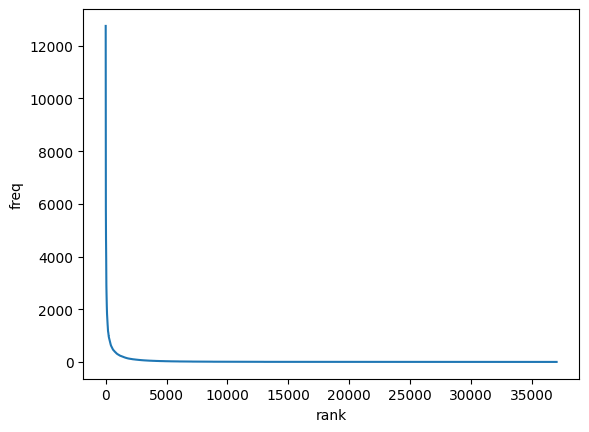

In [17]:
# plot de frecuencia vs ranking (la palabra mas frecuente tiene rank=1, la segunda tiene rank=2, etc..)
plt.plot(range(len(new_df)),new_df.Frequency)
plt.xlabel('rank');plt.ylabel('freq');

In [18]:

  # palabras con 1 sola occurrencia
print("el ",
      round(100*sum(new_df.Frequency==1)/len(new_df.Frequency),2),
      "% de las palabras aparecen 1 sola vez")

print("las 10 palabras mas frecuentes representan el ",
      round(100*new_df.Frequency[:10].sum()/new_df.Frequency.sum(),2),
      "% del corpus")



el  37.25 % de las palabras aparecen 1 sola vez
las 10 palabras mas frecuentes representan el  6.32 % del corpus
